In [1]:
%matplotlib inline
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
import pandas as pd
import csv
import numpy as np
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
analyzer = SentimentIntensityAnalyzer()

INFO: {'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}


In [4]:
from twitterscraper import query_tweets
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [7]:
access_token = "1033758126699364353-x3BuGV7xyqRDzFGavUH6OeCj0WpsUS"
access_secret = "sZWdviYTFuVENnNvcWEyk2G34pEcMt8zdkvGhblQcLSl4"
consumer_key = "NJjaAZwo1ebDZWHTuYFv7PobW"
consumer_secret = "QHQUEYmDoiBMqk0PitkUl2BxbAKp2XEsrVpvKtmgEYr4ZlXkph"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
# Create a custom search term and define the number of tweets
search_term = "#social media marketing -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en").items(15000)


In [12]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [14]:
# Create a custom search term and define the number of tweets
search_term = "#social media marketing -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-12-13').items(10000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
for tweet in tweets_no_urls:
    sent= [TextBlob(tweet).polarity for tweet in tweets_no_urls]
    #print(sent)


In [284]:

sentiment_df = pd.DataFrame(sent)



In [285]:
sentiment_df.columns

RangeIndex(start=0, stop=1, step=1)

In [286]:
sentiment_df.head()

,0
0,0.000000
1,0.033333
2,0.033333
3,0.000000
4,0.000000


In [287]:
sentiment_df.head()

,0
0,0.000000
1,0.033333
2,0.033333
3,0.000000
4,0.000000


Text(0.5, 1.0, 'Sentiments from Tweets JKuat')

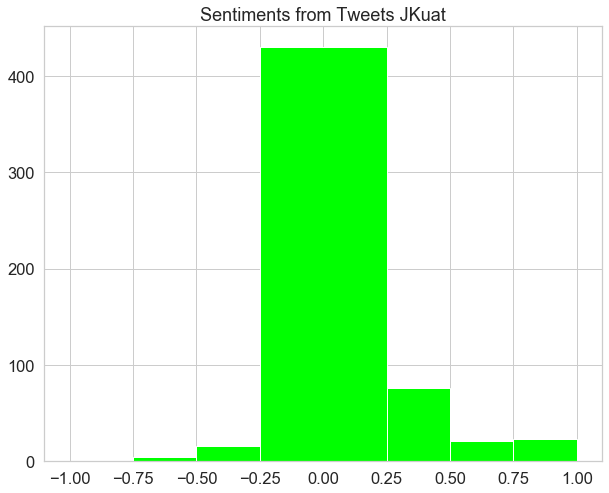

In [297]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="lime")

plt.title("Sentiments from Tweets JKuat")
#plt.show()

In [289]:
# Remove polarity values equal to zero
#sentiment_df = sentiment_df[sentiment_df.polarity != 0]

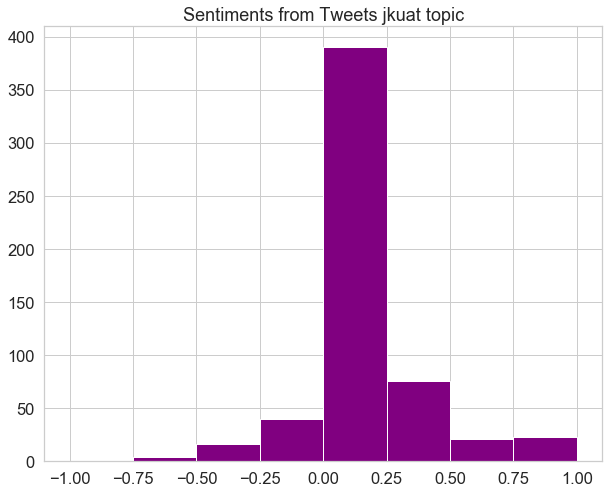

In [296]:

fig, ax = plt.subplots(figsize=(10, 8))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets jkuat topic")
plt.show()

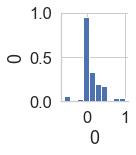

In [310]:
sns.pairplot(sentiment_df,palette='Set20')